In [1]:
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-02 23:18:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  4.81MB/s    in 56s     

2021-07-02 23:19:29 (5.55 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
# Extract zip files
import zipfile
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
# Prepare data for test
!mkdir -p sample_data/test
!cp -rp ./rockpaperscissors/paper/* sample_data/test
!cp -rp ./rockpaperscissors/rock/* sample_data/test
!cp -rp ./rockpaperscissors/scissors/* sample_data/test

In [4]:
# Prepare data for train
!mkdir -p sample_data/train/paper
!mkdir -p sample_data/train/rock
!mkdir -p sample_data/train/scissors

!cp -rp ./rockpaperscissors/paper/* sample_data/train/paper
!cp -rp ./rockpaperscissors/rock/* sample_data/train/rock
!cp -rp ./rockpaperscissors/scissors/* sample_data/train/scissors

In [5]:
# Prepare data for validation
!rm -rf sample_data/validation

import os
from os import path
import shutil

base_data = 'rockpaperscissors'
validation_dir = 'sample_data/validation'

# dir all data
all_data = {
    'paper': os.listdir(path.join(base_data, 'paper')),
    'rock': os.listdir(path.join(base_data, 'rock')),
    'scissors': os.listdir(path.join(base_data, 'scissors')),
}

all_item = 0
for key, data in all_data.items():
  # create a new dir
  os.makedirs(path.join(validation_dir, key))

  # copy files
  for index, i in enumerate(data):
    if index > len(data)*0.4:
      all_item += index-1
      break
    
    shutil.copy(path.join(base_data, key, i), path.join(validation_dir, key, i))
  
  # check copied files
  # print(len( os.listdir(path.join(validation_dir, key))))


# count validation 
print(all_item)

874


In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
import os 
from os import path

base_dir = 'sample_data'
train_dir = path.join(base_dir, 'train')
validation_dir = path.join(base_dir, 'validation')

# prepare dir train
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')

# prepare dir validation
val_paper_dir = os.path.join(validation_dir, 'paper')
val_rock_dir = os.path.join(validation_dir, 'rock')
val_scissors_dir = os.path.join(validation_dir, 'scissors')


# set train data generaor image untuk dapat diberikan label 
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=20,
  horizontal_flip=True,
  shear_range=0.2,
  fill_mode='nearest',
)

validation_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=20,
  horizontal_flip=True,
  shear_range = 0.2,
  fill_mode = 'nearest')


train_generator = train_datagen.flow_from_directory(
  train_dir,  # direktori data latih
  target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
  batch_size=4,
  #  data didalam folder tersebut diacak sehingga tidak sesuai urutan yang ada seperti urutan alfabetik.
  shuffle=True,
  # karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
  class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
  validation_dir, # direktori data validasi
  target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
  batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
  shuffle=True,
  class_mode='categorical')

Found 2188 images belonging to 3 classes.
Found 877 images belonging to 3 classes.


In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 512)      

In [34]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        print("Mulai training...\n")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Memulai epoch {epoch}\n")

    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Memulai batch {batch}\n")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Selesai batch {batch}, loss is {logs['loss']}\n")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Selesai epoch {epoch}, loss is {logs['loss']}, accuracy is {logs['accuracy']}\n")
        
    def on_train_end(self, logs=None):
        print("Selesai training\n")

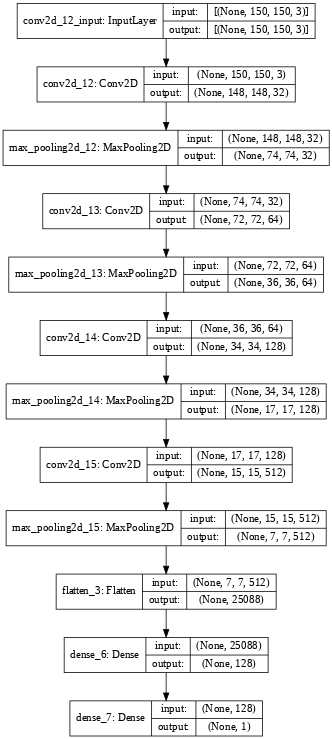

In [23]:
model_viz = tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=55
)
model_viz

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1,
      callbacks=[TrainingCallback()])

In [61]:
# Define Input Parameters
dim = (150, 150)
# dim = (456, 456)
channel = (3, )
input_shape = dim + channel

# evaluate test data
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator

test_data = tf_data_generator(train_generator, input_shape)

# evaluate models
loss, acc =  model.evaluate(x=test_data,steps=len(train_generator),verbose=2)
print(loss, acc)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')

loss, acc = model.evaluate(test_data,steps=len(train_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

547/547 - 39s - loss: 0.0442 - accuracy: 0.9886
0.04417121410369873 0.9885740280151367
Accuracy on training data: 0.9886 
Loss on training data: 0.0442 

Accuracy on test data: 0.9849 
Loss on test data: 0.0514 



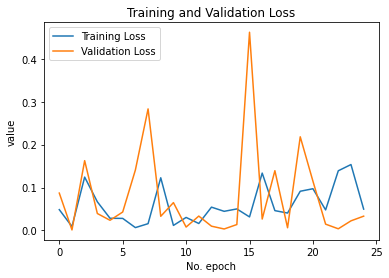

In [62]:
# Plot the Training
from matplotlib import pyplot as plt

# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc='upper left')
plt.show()

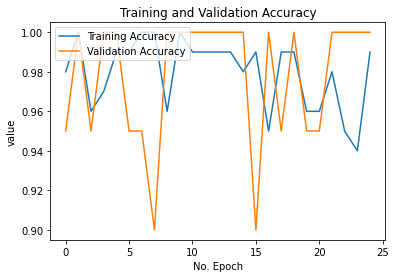

In [63]:
# Plot History: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Save model, thus we can use it later
model.save('my-model')

In [85]:
## Upload File And Predict

import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

# define labels
labels = ['paper', 'rock', 'scissors']
 
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)
 
def predict(path):
  img = Image.open(path)
  X = preprocess(img, dim)
  X = reshape([X])
  y = model.predict(X)
  
  print( labels[np.argmax(y)], np.max(y))


# change it to your filename
test = {
    'paper':'rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png',
    'scissors': 'rockpaperscissors/scissors/0Ug54ifXRqqlZS2Z.png',
    'rock': 'rockpaperscissors/rock/00nKV8oHuTGi20gq.png'
}
 
# predicting images

for key, path in test.items():
  print(key)
  predict(path)


  

paper
[[9.9999964e-01 4.1438535e-16 3.1593933e-07]]
paper 0.99999964
scissors
[[3.3731963e-03 1.0728149e-09 9.9662685e-01]]
scissors 0.99662685
rock
[[8.2376562e-03 9.9174774e-01 1.4695142e-05]]
rock 0.99174774
